In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'


engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_exp_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()


In [3]:
life_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [4]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
life_exp_df.columns=[col.strip() for col in life_exp_df.columns]

In [6]:
life_exp_df.rename(columns = {'thinness  1-19 years': 'thinness 1-19', 'thinness 5-9 years':'thinness 5-9', 
                              'Income composition of resources':'Income' }, inplace=True)

In [7]:
life_exp_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19',
       'thinness 5-9', 'Income', 'Schooling'],
      dtype='object')

In [8]:
life_exp_df.sort_values(by=['Country', 'Year'], inplace=True)

In [9]:
column_list = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19',
       'thinness 5-9', 'Income', 'Schooling']

life_exp_df.reset_index(drop=True, inplace=True)

# Dealing with missing data and outliers

In [10]:
# missing data replaced by near points

column_list = ['Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19',
       'thinness 5-9', 'Income', 'Schooling']

country_list = life_exp_df.Country.unique()


df=life_exp_df.copy()
for column in column_list:
    df.loc[:, column].interpolate(method='index', limit_area='inside', inplace=True)
    


    
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 2936
Data columns (total 22 columns):
Country                   2937 non-null object
Year                      2937 non-null int64
Status                    2937 non-null object
Life expectancy           2937 non-null float64
Adult Mortality           2937 non-null float64
infant deaths             2937 non-null int64
Alcohol                   2937 non-null float64
percentage expenditure    2937 non-null float64
Hepatitis B               2937 non-null float64
Measles                   2937 non-null int64
BMI                       2937 non-null float64
under-five deaths         2937 non-null int64
Polio                     2937 non-null float64
Total expenditure         2937 non-null float64
Diphtheria                2937 non-null float64
HIV/AIDS                  2937 non-null float64
GDP                       2937 non-null float64
Population                2937 non-null float64
thinness 1-19             2937 non-null

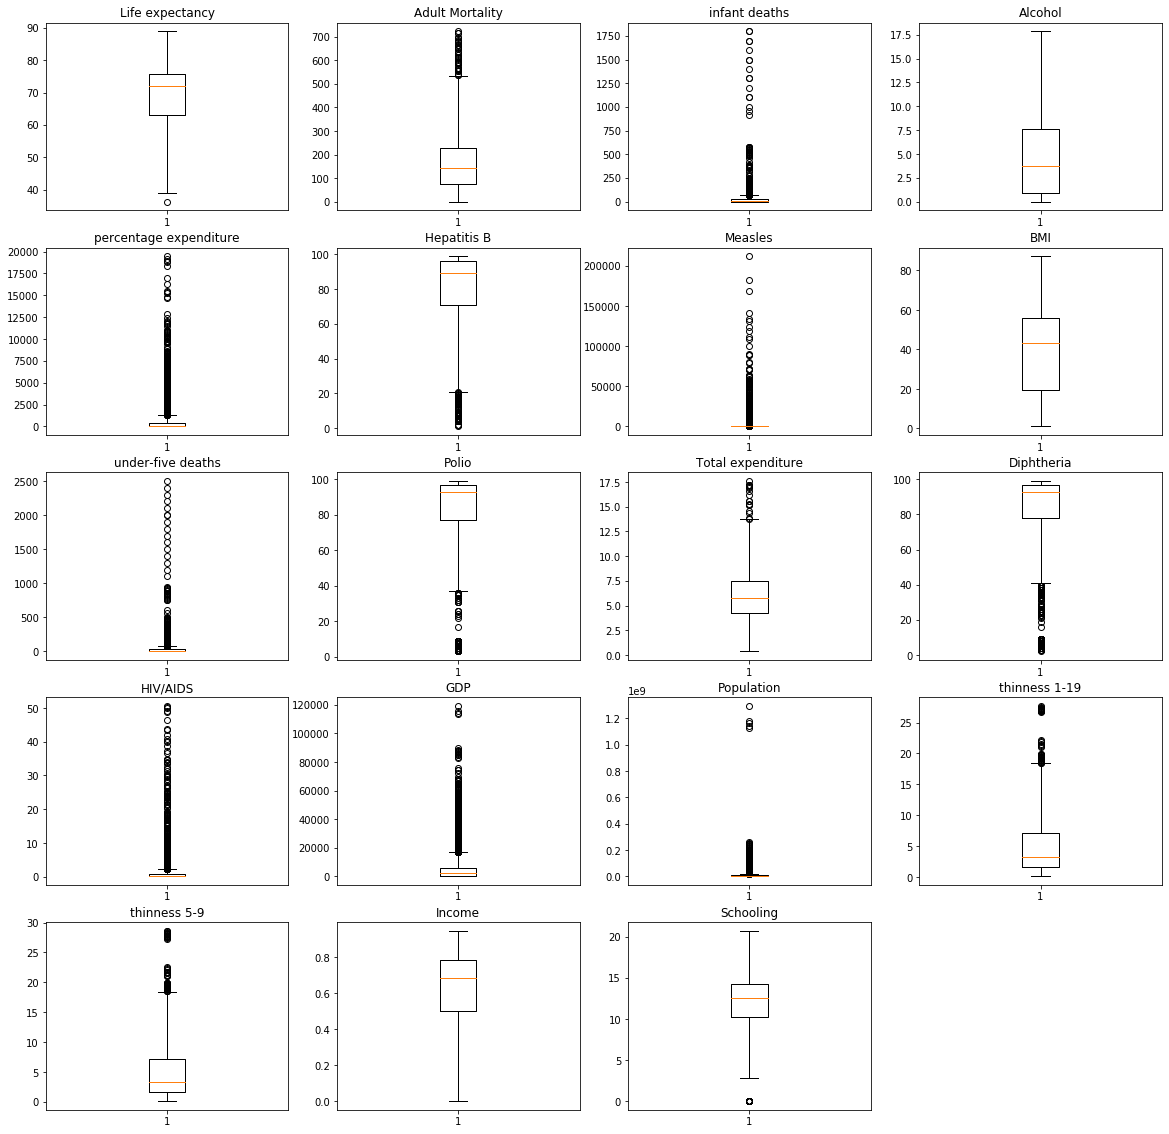

In [12]:
# looking for outliers
plt.figure(figsize=(20,20))

for i, column in enumerate(column_list, start = 1):
    plt.subplot(5, 4, i)
    plt.boxplot(df[column], whis=2)
    plt.title(column)
    
plt.show()    

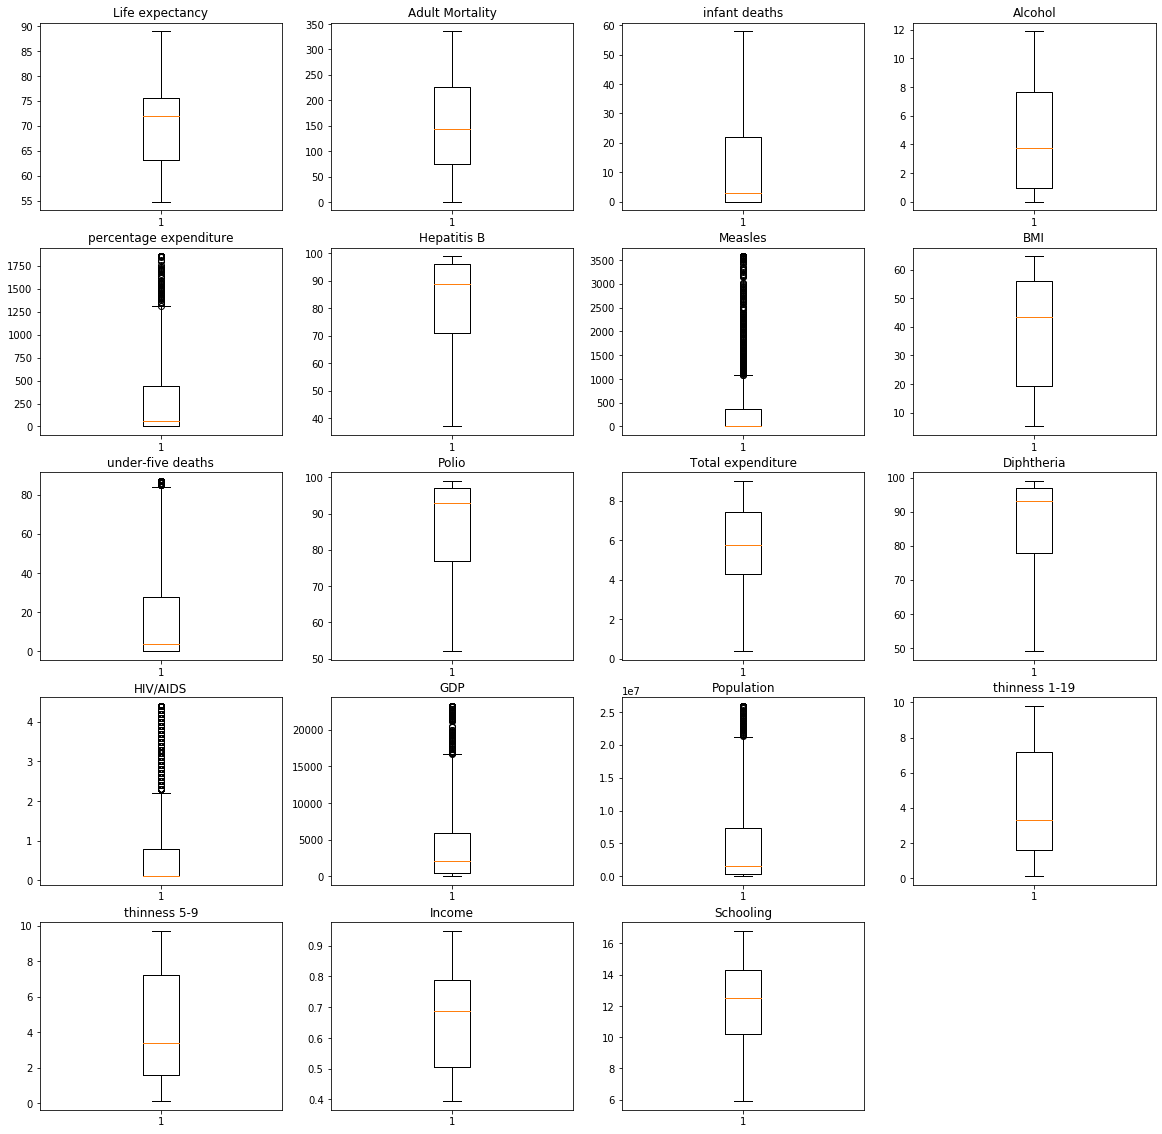

In [13]:
# winsorize the outliers
from scipy.stats.mstats import winsorize
top_winsorize_list = ['Adult Mortality','infant deaths', 'percentage expenditure', 
       'Measles', 'under-five deaths', 'Total expenditure','HIV/AIDS', 'GDP', 'Population', 'thinness 1-19',
       'thinness 5-9']

bottom_winsorize_list = ['Life expectancy', 'Hepatitis B', 'Polio', 'Diphtheria', 'Income'] 
                         
both_winsorize_list = ['Alcohol', 'BMI', 'Schooling']

winsorized_df=df.copy()
for column in top_winsorize_list:
    winsorized_df[column]=winsorize(df[column], (0, 0.1))

for column in bottom_winsorize_list:
    winsorized_df[column]=winsorize(df[column], (0.1, 0))

for column in both_winsorize_list:
    winsorized_df[column]=winsorize(df[column], (0.05, 0.05))


plt.figure(figsize=(20,20))

for i, column in enumerate(column_list, start = 1):
    plt.subplot(5, 4, i)
    plt.boxplot(winsorized_df[column], whis=2)
    plt.title(column)
    
plt.show()

These are still outliers in the dataset.  These important outliers should be kept for that they are the health-related challenges each country was facing.  

# Exploring the data using univariate and multivariate exploration techniques.

In [14]:
winsorized_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19,thinness 5-9,Income,Schooling
count,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2937.00000,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2937.000000,2.937000e+03,2937.000000,2937.000000,2937.000000,2937.000000
mean,2007.516173,69.670225,155.251107,13.946204,4.522955,369.921232,80.317212,586.73953,38.298212,20.000681,85.429471,5.771134,85.077922,0.877664,5339.677850,5.793062e+06,4.348226,4.347013,0.656864,12.134389
std,4.612560,8.609754,101.334297,19.800654,3.890058,588.270941,20.266319,1151.24431,19.496733,29.597079,15.351548,2.107783,15.986666,1.431917,7310.044547,8.307614e+06,3.179511,3.175089,0.162398,2.944473
min,2000.000000,54.800000,1.000000,0.000000,0.010000,0.000000,37.000000,0.00000,5.200000,0.000000,52.000000,0.370000,49.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.394000,5.900000
25%,2004.000000,63.100000,74.000000,0.000000,0.930000,4.720594,70.857143,0.00000,19.400000,0.000000,77.000000,4.290000,78.000000,0.100000,474.223877,2.888352e+05,1.600000,1.600000,0.504000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.750000,64.969645,89.000000,17.00000,43.500000,4.000000,93.000000,5.760000,93.000000,0.100000,2124.662666,1.556524e+06,3.300000,3.400000,0.686000,12.500000
75%,2012.000000,75.600000,227.000000,22.000000,7.630000,441.844624,96.000000,361.00000,56.100000,28.000000,97.000000,7.440000,97.000000,0.800000,5878.761270,7.291436e+06,7.200000,7.200000,0.788000,14.300000
max,2015.000000,89.000000,336.000000,58.000000,11.900000,1855.828806,99.000000,3585.00000,64.700000,87.000000,99.000000,8.990000,99.000000,4.400000,23227.616044,2.591488e+07,9.800000,9.700000,0.948000,16.800000


In [15]:
winsorized_df.groupby('Status').mean()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19,thinness 5-9,Income,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,2007.500000,79.197852,79.685547,1.494141,9.459766,953.846778,84.034830,248.460938,51.657813,1.810547,94.324219,7.074443,94.257812,0.100000,12557.230301,4.478276e+06,1.320703,1.296680,0.848468,15.355279
Developing,2007.519588,67.658619,171.205567,16.575258,3.480627,246.634684,79.532297,658.161649,35.477546,23.841237,83.551487,5.495961,83.139735,1.041856,3815.806982,6.070658e+06,4.987440,4.991042,0.616410,11.454349


** The average life expectancy is 69.7.  ** The average life expectancy in developed country is 79.2 while in developing country us 67.7.  

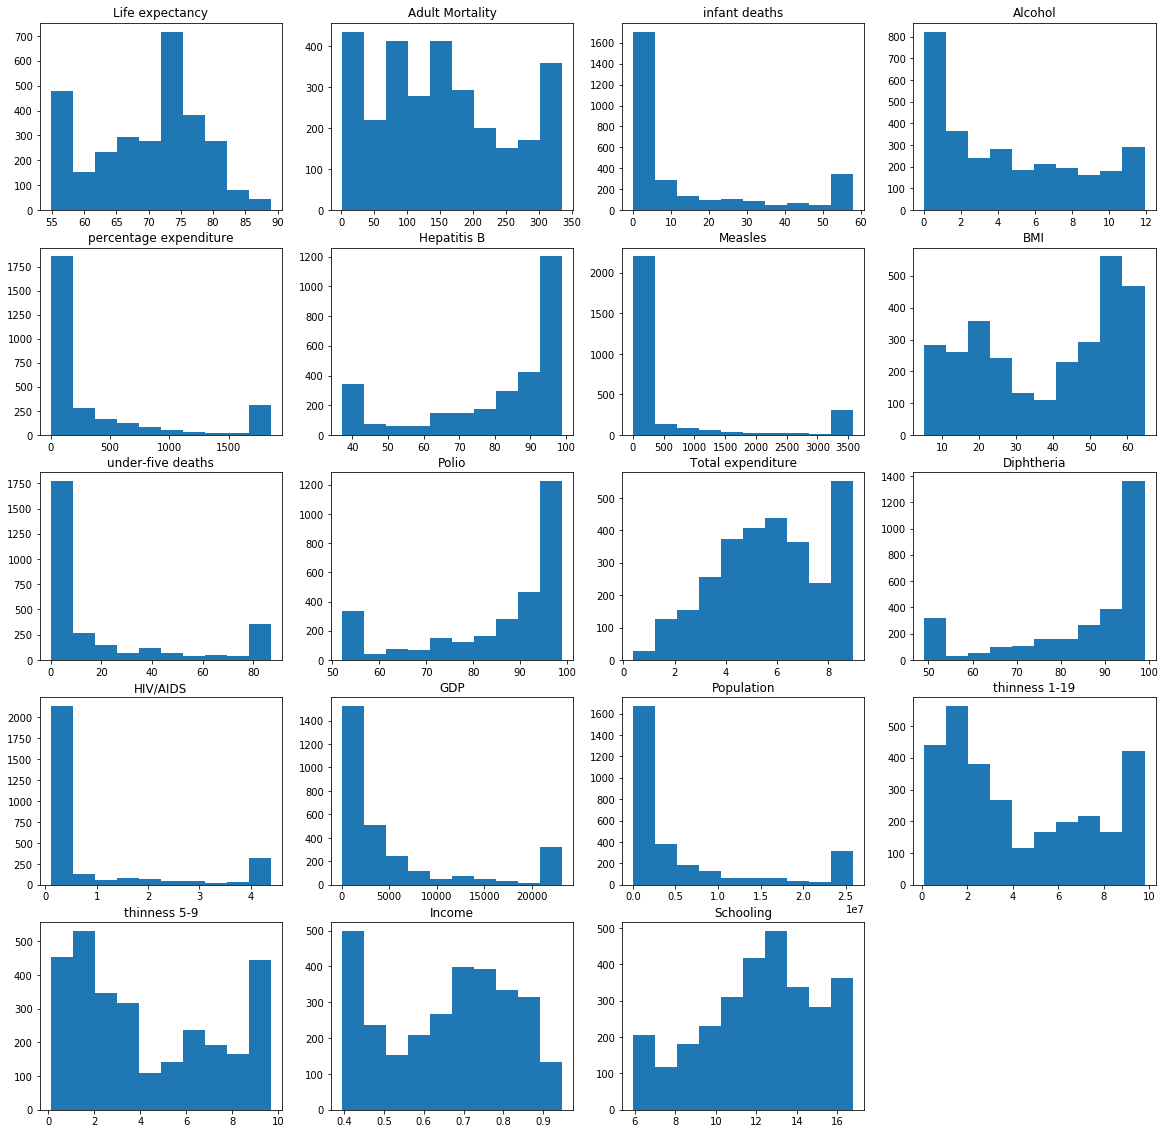

In [16]:
plt.figure(figsize=(20,20))

for i, column in enumerate(column_list, start = 1):
    plt.subplot(5, 4, i)
    plt.hist(winsorized_df[column])
    plt.title(column)
    
plt.show()

The extreme data in this case shows significant information regarding to the challenges each country is facing.  For example, the following countries have HIV/AIDS epidemic problems.  

In [17]:
winsorized_df[winsorized_df['HIV/AIDS']>4]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19,thinness 5-9,Income,Schooling
336,Botswana,2000,Developing,54.8,336.0,2,5.370000,250.891648,86.000000,2672,...,97.00,4.640000,97.000000,4.4,3349.688230,1.728340e+05,9.800000,9.700000,0.559000,11.700000
337,Botswana,2001,Developing,54.8,336.0,2,5.480000,306.952735,87.000000,1,...,97.00,5.730000,97.000000,4.4,3128.977930,1.754935e+06,9.800000,9.700000,0.560000,11.800000
338,Botswana,2002,Developing,54.8,336.0,2,6.410000,6.330007,88.000000,7,...,97.00,6.470000,97.000000,4.4,355.618382,1.779953e+06,9.800000,9.700000,0.558000,11.900000
339,Botswana,2003,Developing,54.8,336.0,2,5.510000,299.367125,37.000000,59,...,96.00,4.650000,96.000000,4.4,4163.659600,1.843390e+05,1.900000,1.800000,0.567000,11.800000
340,Botswana,2004,Developing,54.8,336.0,2,4.900000,469.582390,91.000000,1,...,96.00,5.560000,96.000000,4.4,4896.583835,1.829330e+05,1.500000,1.400000,0.580000,11.800000
341,Botswana,2005,Developing,54.8,336.0,2,6.370000,629.842564,92.000000,5,...,96.00,5.620000,96.000000,4.4,5351.253732,1.855852e+06,1.000000,9.700000,0.593000,11.900000
342,Botswana,2006,Developing,54.8,336.0,2,6.450000,76.318679,93.000000,6,...,96.00,4.930000,96.000000,4.4,5374.554867,1.884238e+06,9.600000,9.400000,0.610000,11.900000
343,Botswana,2007,Developing,56.9,336.0,2,6.210000,512.588800,93.000000,1,...,96.00,4.710000,96.000000,4.4,5714.479370,1.914414e+06,9.200000,9.000000,0.630000,12.100000
344,Botswana,2008,Developing,57.5,336.0,2,6.560000,476.862587,94.000000,0,...,96.00,5.550000,96.000000,4.4,5623.379566,1.946351e+06,8.800000,8.600000,0.646000,12.100000
345,Botswana,2009,Developing,59.2,336.0,2,5.010000,426.785566,94.000000,184,...,96.00,6.390000,96.000000,4.4,5185.729845,1.979882e+06,8.400000,8.200000,0.661000,12.200000


## Multivariate analysis regarding life expectancy

In [18]:
winsorized_df[column_list].corr()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19,thinness 5-9,Income,Schooling
Life expectancy,1.000000,-0.675742,-0.564893,0.416348,0.504127,0.280148,-0.293166,0.567497,-0.590329,0.577464,0.230531,0.575262,-0.742123,0.511308,-0.019694,-0.600552,-0.604440,0.801637,0.740903
Adult Mortality,-0.675742,1.000000,0.370313,-0.211459,-0.340466,-0.172326,0.166736,-0.388097,0.384693,-0.361515,-0.142416,-0.357757,0.520702,-0.336715,0.026131,0.391469,0.403766,-0.524036,-0.464859
infant deaths,-0.564893,0.370313,1.000000,-0.315325,-0.323178,-0.237595,0.561442,-0.447092,0.993802,-0.422399,-0.149616,-0.408646,0.383224,-0.336686,0.340172,0.425966,0.447289,-0.452120,-0.475625
Alcohol,0.416348,-0.211459,-0.315325,1.000000,0.384284,0.071402,-0.165792,0.340048,-0.310465,0.263598,0.305619,0.261480,-0.117567,0.400734,-0.024343,-0.470371,-0.460909,0.508879,0.513337
percentage expenditure,0.504127,-0.340466,-0.323178,0.384284,1.000000,0.034102,-0.157737,0.313734,-0.319896,0.255163,0.175464,0.244509,-0.238735,0.791798,-0.049555,-0.353545,-0.360801,0.525070,0.490470
Hepatitis B,0.280148,-0.172326,-0.237595,0.071402,0.034102,1.000000,-0.207278,0.180613,-0.251489,0.541826,0.085146,0.589968,-0.270990,0.085016,-0.032793,-0.111305,-0.123020,0.245775,0.245019
Measles,-0.293166,0.166736,0.561442,-0.165792,-0.157737,-0.207278,1.000000,-0.305287,0.563686,-0.296832,-0.160825,-0.285007,0.168238,-0.160294,0.224275,0.285998,0.294629,-0.220534,-0.268675
BMI,0.567497,-0.388097,-0.447092,0.340048,0.313734,0.180613,-0.305287,1.000000,-0.466115,0.342873,0.231288,0.336910,-0.426518,0.317738,-0.020873,-0.571567,-0.581933,0.542681,0.522184
under-five deaths,-0.590329,0.384693,0.993802,-0.310465,-0.319896,-0.251489,0.563686,-0.466115,1.000000,-0.443312,-0.149881,-0.430778,0.412430,-0.334564,0.323343,0.434230,0.452026,-0.470630,-0.493943
Polio,0.577464,-0.361515,-0.422399,0.263598,0.255163,0.541826,-0.296832,0.342873,-0.443312,1.000000,0.164430,0.851426,-0.446983,0.304948,-0.032071,-0.302407,-0.302362,0.520586,0.517245


Schooling and Income are positively correlated to life expectancy, while adult mortality, and HIV are negatively correlated. 

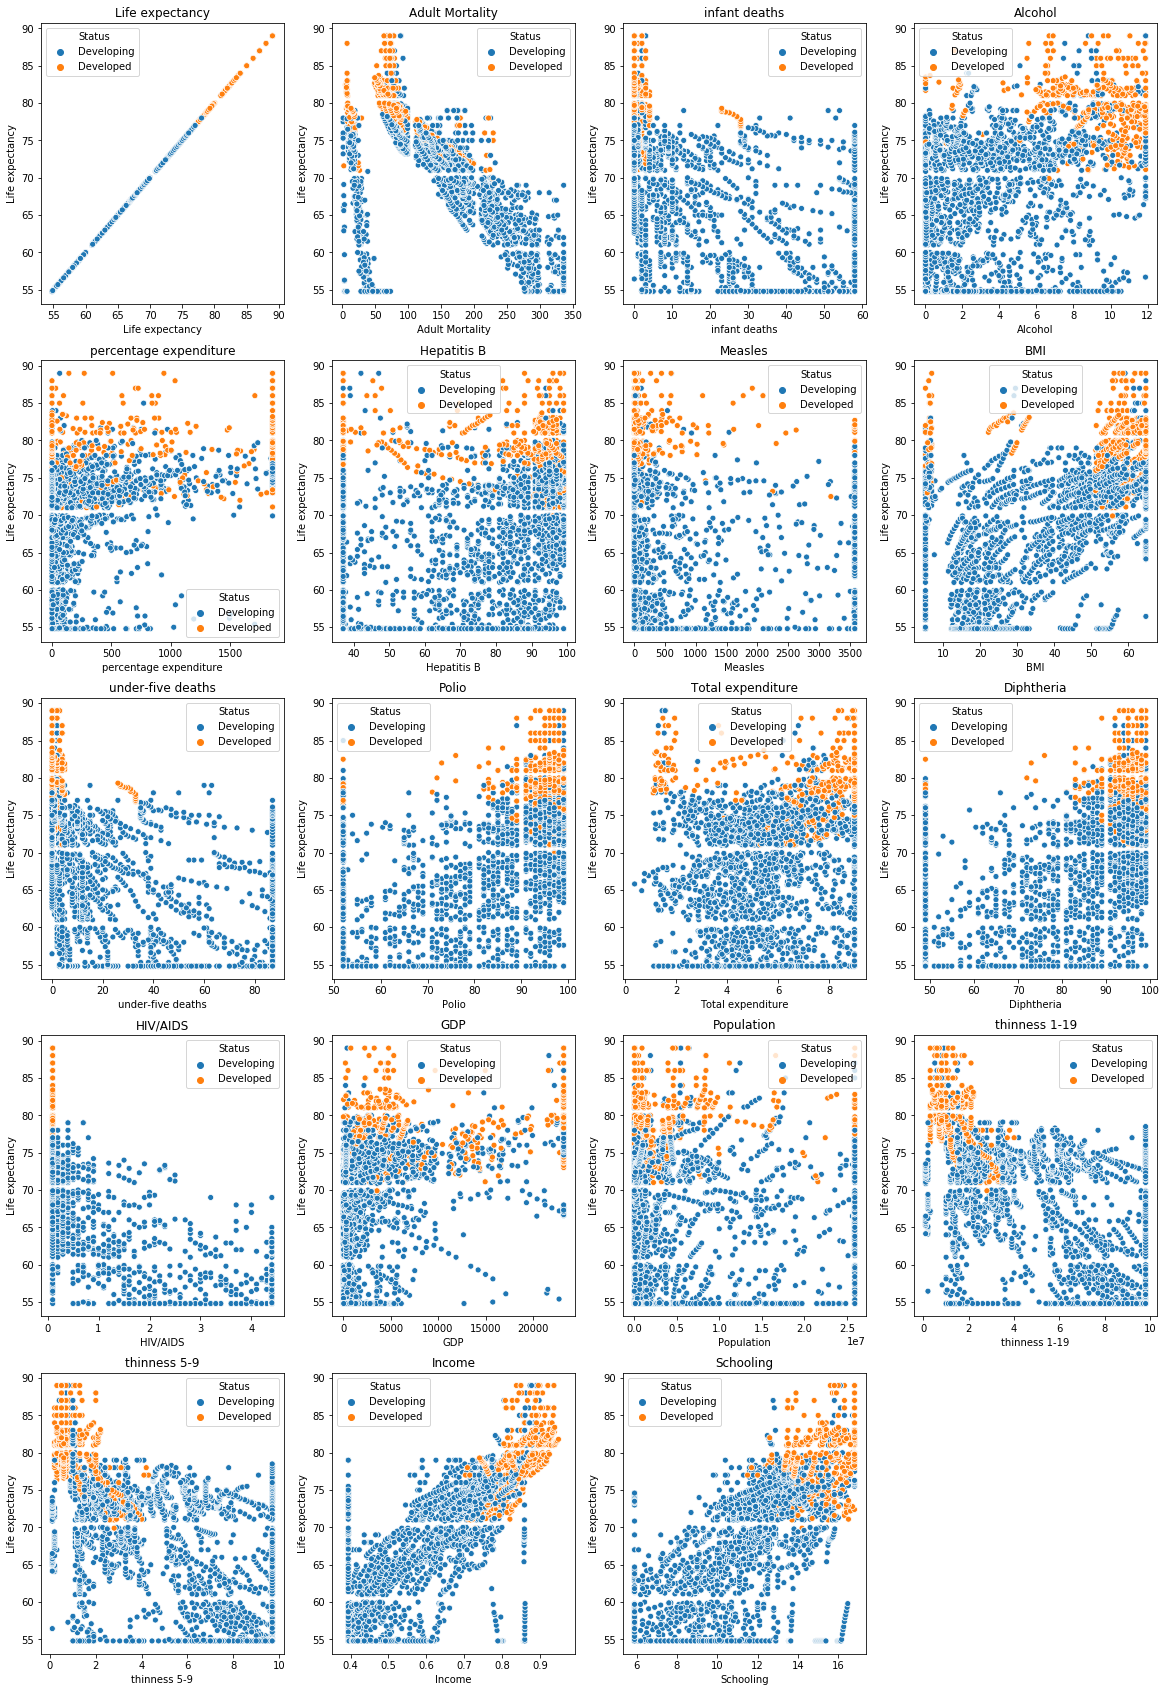

In [19]:
plt.figure(figsize=(20, 30))


for i, column in enumerate(column_list, start = 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(y='Life expectancy', x= column, hue='Status', data = winsorized_df)
    plt.title(column)
    
plt.show()    


## Feature engineering

### Normalizing

In [20]:
# get dummies for the categorical variables
winsorized_df=pd.concat([winsorized_df, pd.get_dummies(winsorized_df['Status'])], axis=1)

In [21]:
# box_cox to normalizing data
from scipy.stats import boxcox

box_cox_df = winsorized_df.copy()

for column in column_list:
    box_cox_df[column], _ = boxcox(winsorized_df[column]+ 0.001)  # only the positive value


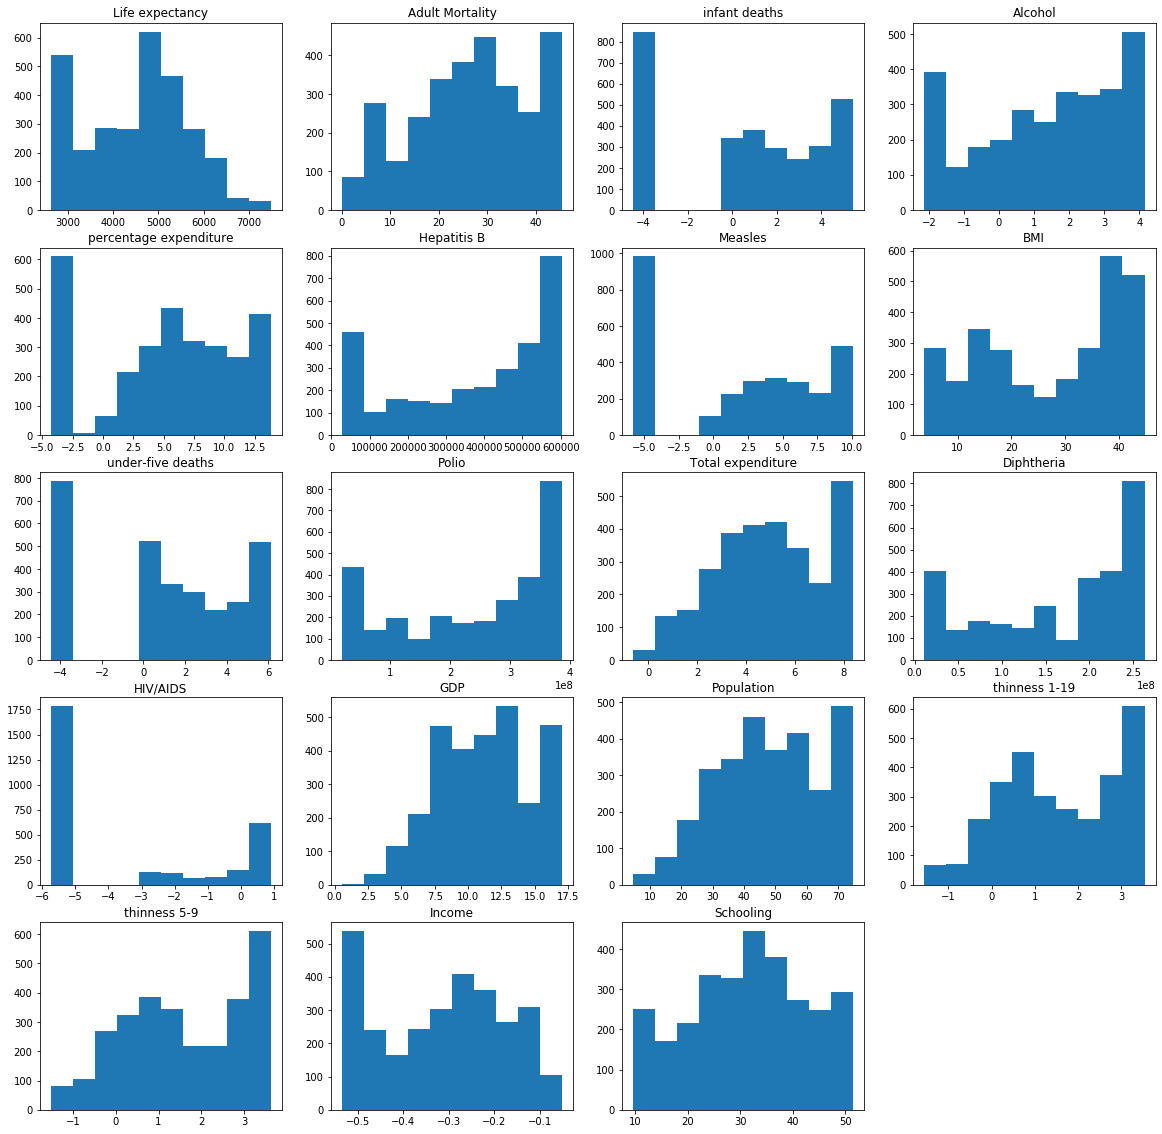

In [22]:
# Plot after box_cox transformation
plt.figure(figsize=(20,20))

for i, column in enumerate(column_list, start = 1):
    plt.subplot(5, 4, i)
    plt.hist(box_cox_df[column])
    plt.title(column)
    
plt.show()

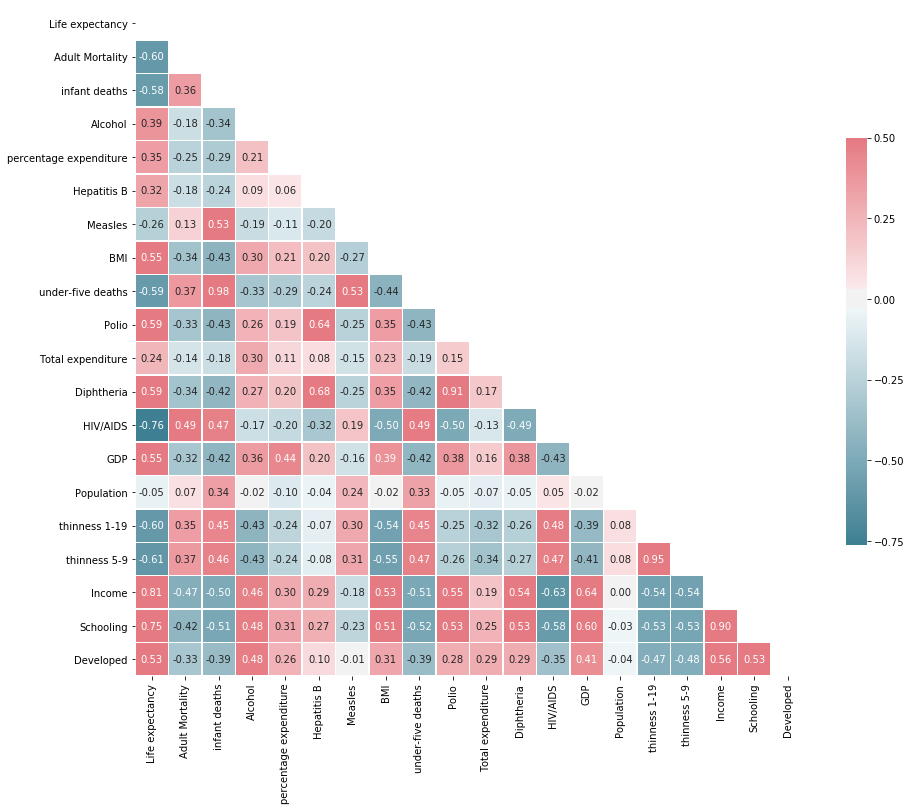

In [23]:
# Heat Map for correlation
# Generate a mask for the upper triangle

column_list.append('Developed')


mask = np.zeros_like(box_cox_df[column_list].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(box_cox_df[column_list].corr(), mask=mask, annot=True, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .5})



plt.show()

('Infant deaths', 'under-five deaths'), ('thinness 1-19', 'thinness 5-9'), ('under-five death', 'infant deaths'), ('Diphtheria', 'Polio') are highly correlated.  We can reduce the variables by combining them.  

'Life expectancy' = function of ['Developed, 'Adult Mortality', 'infant deaths', 'BMI', 'Polio', 'HIV/AIDS', 'GDP', 'thinness1-19', 'Income']